In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree,DecisionTreeClassifier,DecisionTreeRegressor

In [7]:
df=pd.read_csv("cleaned_titanic.csv")

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [10]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
dt=DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

In [13]:
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred=dt.predict(X_test)

In [15]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.7988826815642458


In [16]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Confusion matrix:
 [[92 13]
 [23 51]]


In [17]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



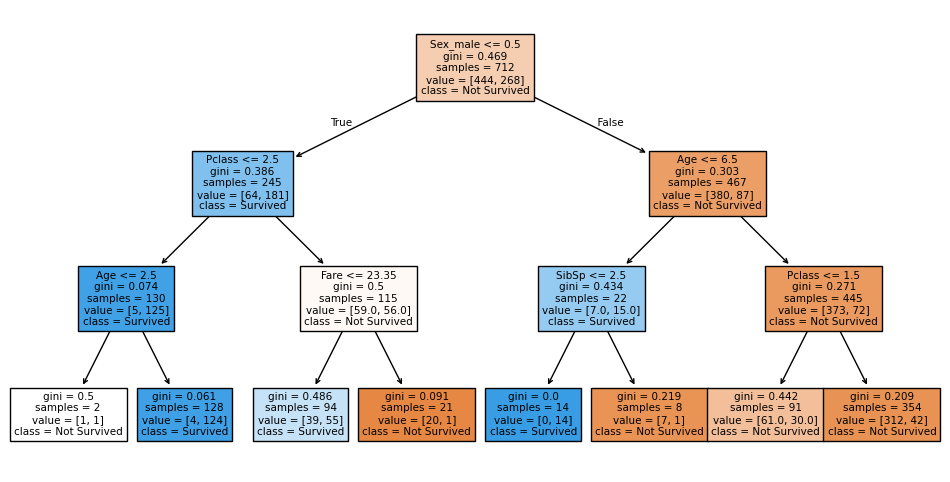

In [18]:
plt.figure(figsize=(12,6))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Not Survived","Survived"],
    filled=True)
plt.show()

<h1>Regression</h1>

In [19]:
dtr=DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42
)

In [20]:
X_=df.drop("Fare",axis=1)
y_=df["Fare"]

In [21]:
X_train_,X_test_,y_train_,y_test_=train_test_split(X_,y_,test_size=0.2,random_state=42)

In [22]:
dtr.fit(X_train_,y_train_)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
y_pred_=dtr.predict(X_test_)

In [24]:
mse=np.sqrt(mean_squared_error(y_test_,y_pred_))
print("MSE: ",mse)

MSE:  30.04728010900088


In [25]:
print(f"Min percentage error: {((np.sqrt(mse)/df["Fare"].max())*100).round(2)}")

Min percentage error: 1.07


In [26]:
df["Fare"].min()

np.float64(0.0)

R2 score:<br>
1 - good<br>
0 - bad

In [27]:
print("R2 score: ",r2_score(y_test_,y_pred_))

R2 score:  0.4165556671452353


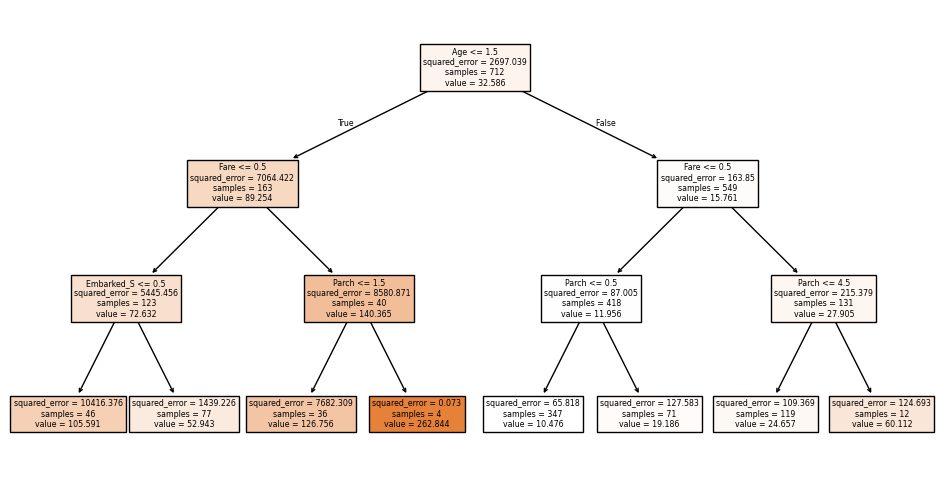

In [28]:
plt.figure(figsize=(12,6))
plot_tree(
    dtr,
    feature_names=X.columns,
    filled=True)
plt.show()